# Signal Processing Tools



### Rebeca Goya Esteban, Óscar Barquero Pérez

update: 30 de enero de 2020

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Licencia de Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />Este obra está bajo una <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">licencia de Creative Commons Reconocimiento-NoComercial-CompartirIgual 4.0 Internacional</a>. 

## Introduction

This is a collection of signal processing tools which comes with simulated examples. You want to try these techniques in your daily work with signals.

Note: This is an ongoing project in which we try to present several techniques from the practical point of view. The mathematical description could be sometimes *weak*, we are improving this part.

some exmaples from:

Mike X Cohen Udemy courses

The following is a list of the tools covered in this notebook:

 1. *Smoothing signal.* 

## 1. Smoothing - 

### 1.1 Moving average filter

### Description

Is a smoothing technique applied to times series signals. It is sometimes called *running mean*, *rolling average*.

It filters a time series to obtain a new time series by averaging different subsets of the full time series.

It is a very easy filter, but it is optimal (maximum likelihood) for reducin random noise while retaining sharp-step response.

It is a *convolution* between input signal an a rectangular pulse filter kernel, with amplitud $1/M$, where $M$ is the widtTah of the rectangula pulse.

The equation is:

$$y[n] = \frac{1}{2N+1}\sum^{n+N}_{k =n-N} x[k]$$

Many scientists and engineers feel guilty about using the moving average filter (sic) [DSPGuide]

We propose to use the nice implementation from [Scipy-cookbook Signal processing](https://scipy-cookbook.readthedocs.io/items/SignalSmooth.html)

### Example

Example from 
[Scipy-cookbook Signal processing](https://scipy-cookbook.readthedocs.io/items/SignalSmooth.html)

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from signal_processing_tools import *
import numpy as np

(100,)


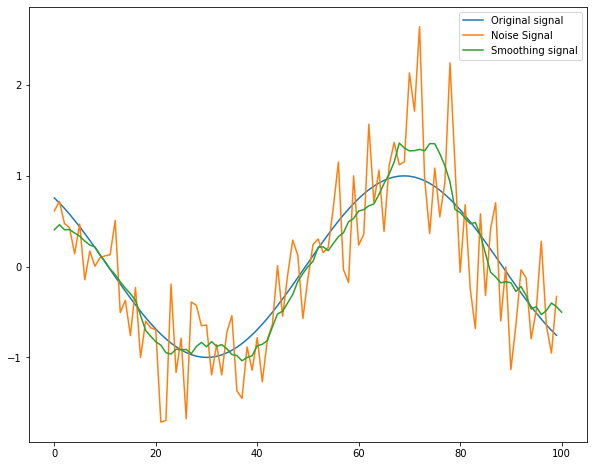

In [13]:
#create a sinusoidal signal
t=np.linspace(-4,4,100)
x = np.sin(t)
print(x.shape)

#add random noise
xn = x + np.random.randn(len(t))*0.5

#smoothing
y = smooth(xn,window_len=11,window='flat') # flat = rectangular

plt.figure(figsize = (10,8))
plt.plot(x,label = 'Original signal')
plt.plot(xn,label = 'Noise Signal')
plt.plot(y,label = 'Smoothing signal')
plt.legend()

###  1.2. Smoothing Gaussian

This a similiar tool as previoues, but using a Gaussian kernel, defined as:

The Gaussian kernel is one of the most widely used kernels, and is expressed with the equation below.


$$K(t)=e^\left(-{\frac {t^{2}}{2\sigma^{2}}}\right)$$

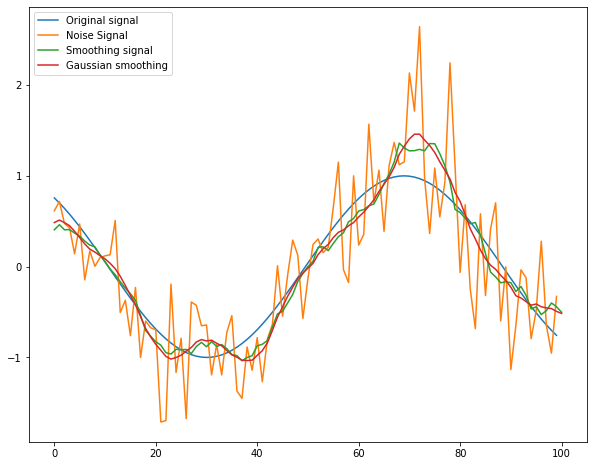

In [14]:
#Guassian smoothin

y_g = gaussian_smoothing(x,w_len = 11,sigma=3) 


plt.figure(figsize = (10,8))
plt.plot(x,label = 'Original signal')
plt.plot(xn,label = 'Noise Signal')
plt.plot(y,label = 'Smoothing signal')
plt.plot(y_g,label = 'Gaussian smoothing')
plt.legend()


### 1.3 Event detection: probability estimation

In this example, we are going to use gaussian filtering to create a pseudo-probability distribution of events. We are going to think that we have available a sequence of events that occurs at given (stochastic) times, and we want to create a probability distribution with the time for the event occurrence.

[ 0.  2.  2.  1.  2.  3.  2.  0.  9. 10.  1.  8.  2.  6.  6.  3.  1.  4.
  6.  0.  6.  3.  1.  0.  8.  1.  3. 27.  0.  1. 11.  4.  2. 17.  7. 10.
  4.  5.  2.  1.  3.  1.  3.  0.  1.  3.  6.  6. 14.  3.  3.  8.  2.  9.
  5.  3.  3.  0. 19.  1.  3.  8. 11.  5. 21.  3.  0. 17. 13.  5.  3.  2.
  2.  3.  9.  6.  3.  8.  3.  5.  8.  2.  2.  0.  7.  8.  9.  7.  0.  5.
  0. 19. 10.  6.  8.  4.  5.  0.  5.  3.]
(512,)


Text(0.5, 0, 'Time (a.u.)')

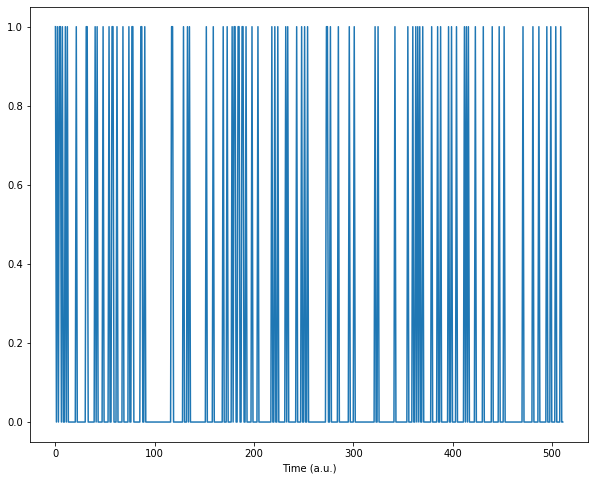

In [15]:
## generate time series of random spikes

# number of spikes
n = 100

# inter-spike intervals (exponential distribution for bursts)
#inter-spike interval

time_interval = np.round(np.random.exponential(5,n))

print(time_interval)
#isi = np.round(np.exp( np.random.randn(n) )*10)

# generate spike time series
events = np.zeros(int(np.sum(time_interval)))
print(events.shape)

idx = np.cumsum(time_interval)
idx = np.asarray(idx,dtype = int)

events[idx[:-1]] = 1


# plot
plt.figure(figsize = (10,8))
plt.plot(events)
plt.xlabel('Time (a.u.)')

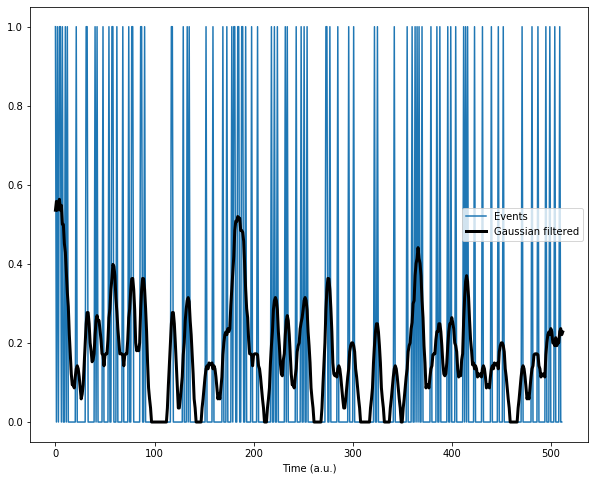

In [16]:
#smoothing signal with gaussian kernel

prob_events = gaussian_smoothing(events,w_len = 11,sigma=3) 


plt.figure(figsize = (10,8))
plt.plot(events,label = 'Events')
plt.plot(prob_events,'k',linewidth = 3, label = 'Gaussian filtered')
plt.xlabel('Time (a.u.)')

plt.legend()

## 2. Feature Detection 

In this section we are going to show some feature detection schemes


### 2.1 Local Maximum and minimum 

How to find localc maximum and minimum in a signal

Fist we are going to create a sinc singal, and then we are goint to add a linear trend

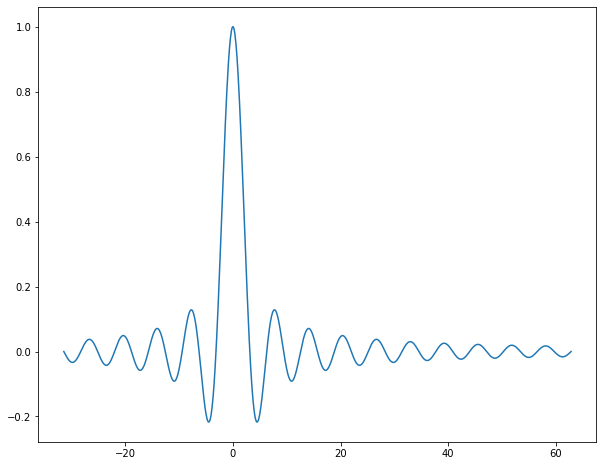

In [17]:
t = np.linspace(-10*np.pi,20*np.pi,1000)

y = np.sin(t)/t

plt.figure(figsize = (10,8))

plt.plot(t,y)

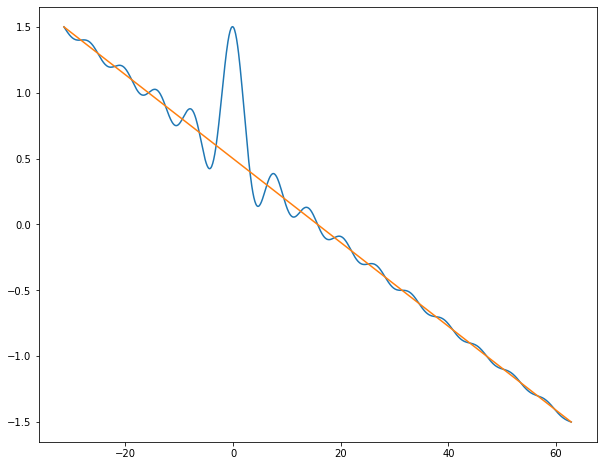

In [19]:
#add linear trend

trend = np.linspace(1.5,-1.5,len(t))

y_t = y+trend

plt.figure(figsize = (10,8))
plt.plot(t,y_t)
plt.plot(t,trend)

In this situation, slow oscillations may obscure the rest of the signal. This can be observed in the periodogram

10


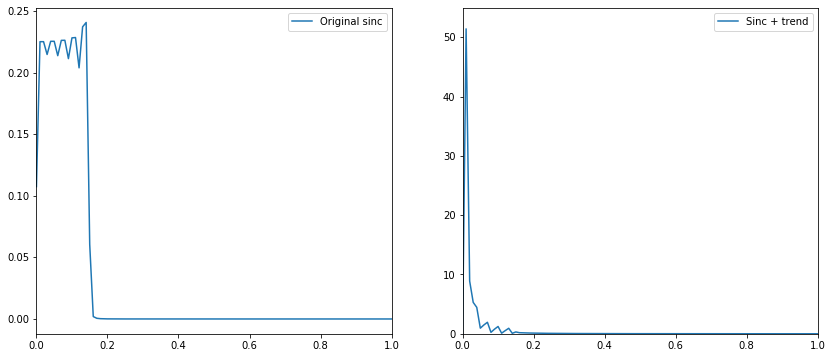

In [24]:
import scipy.signal as sc

fs = 1/(t[1]-t[0])
print(int(fs))

#periodogram
f,P = sc.welch(y, fs = int(fs),window= 'boxcar', nperseg= len(y), noverlap= 0, nfft= len(y), detrend= False) 
# periodogram without detrend 
# also p = 1/len(y) + np.abs(np.fft.fft(y))**2 , has to be equal than previous
f,P_trend = sc.welch(y_t, fs = int(fs),window= 'boxcar', nperseg= len(y), noverlap= 0, nfft= len(y), detrend= False) # periodogram with trend

plt.figure(figsize = (14,6))
plt.subplot(121)
plt.xlim(0,1)
#plt.ylim(0,55)
plt.plot(f,P,label = 'Original sinc')

plt.legend()
plt.subplot(122)
plt.plot(f,P_trend,label = 'Sinc + trend')
plt.xlim(0,1)
plt.ylim(0,55)
plt.legend()



The first step is to **detrend** the signal. There is several options to do that. Simple way is to fit a straight line en remove it. This can be easily done uisng scipy.signal.detrend

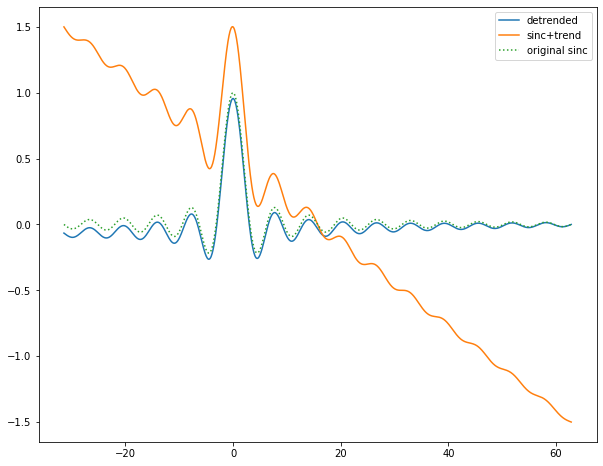

In [25]:
y_d = sc.detrend(y_t)

plt.figure(figsize=(10,8))

plt.plot(t,y_d,label = 'detrended')
plt.plot(t,y_t,label = 'sinc+trend')
plt.plot(t,y,':',label = 'original sinc')
plt.legend()

We are going to use a procedure using first and second derivative to obtain the maxima and minima, we are going to see each operation at a time, and then we are goint to pack them into a function:

 1. First derivative: it has to be zero at maxima and minima. Note the difference in length.
 1. Sign of the first derivative: It allows to identify a maxima and minina by a change of sign.
 1. Derivative of the sign of the first derivative. This signal is activated when is a change in the sign of the previous signal.
 1. If the last signal is positive, then there is a minimum, if the last signal is negative, there is a maximum

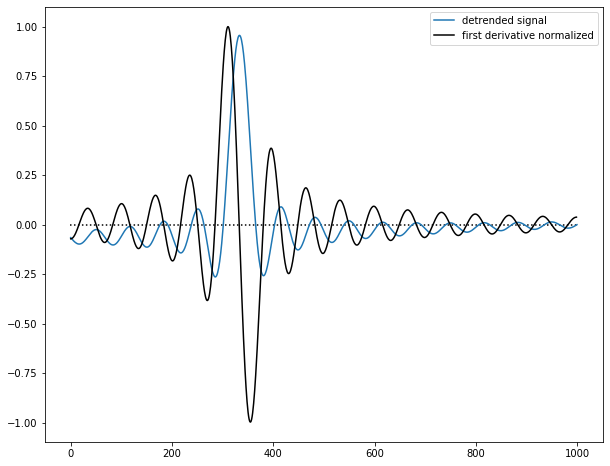

In [26]:
#1. first derivative

y_prime = np.diff(y_d)

plt.figure(figsize = (10,8))
plt.plot(y_d,label = 'detrended signal')
plt.plot(y_prime/np.max(np.abs(y_prime)),'k',label = 'first derivative normalized')
plt.hlines(0,-1,1000,color = 'k',linestyle = ':')
plt.legend()

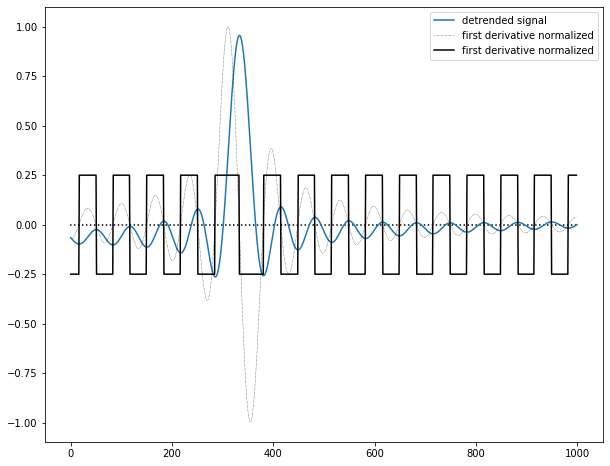

In [27]:
#2. sign of the first derivative

sig_y_prime = np.sign(y_prime)

plt.figure(figsize = (10,8))
plt.plot(y_d,label = 'detrended signal')
plt.plot(y_prime/np.max(np.abs(y_prime)),'k:',linewidth = 0.5,label = 'first derivative normalized')
plt.plot(sig_y_prime/np.max(np.abs(sig_y_prime))*1/4,'k',label = 'first derivative normalized')
plt.hlines(0,-1,1000,color = 'k',linestyle = ':')
plt.legend()

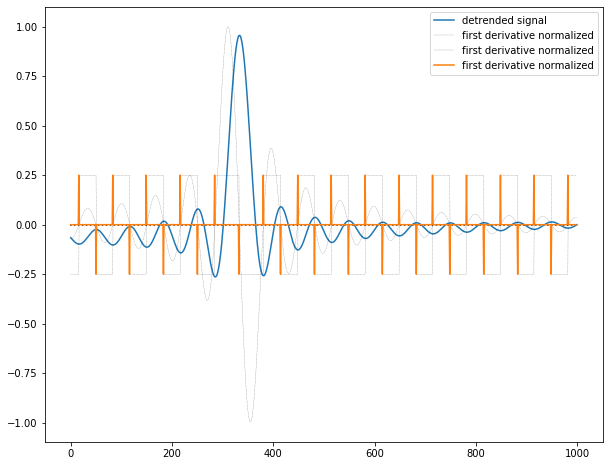

In [28]:
#3. derivative of the sign of the first derivative

y_two_prime = np.diff(sig_y_prime)

plt.figure(figsize = (10,8))
plt.plot(y_d,label = 'detrended signal')
plt.plot(y_prime/np.max(np.abs(y_prime)),'k:',linewidth = 0.3,label = 'first derivative normalized')
plt.plot(sig_y_prime/np.max(np.abs(sig_y_prime))*1/4,'k:',linewidth = 0.3,label = 'first derivative normalized')
plt.plot(y_two_prime/np.max(np.abs(y_two_prime))*1/4,label = 'first derivative normalized')
plt.hlines(0,-1,1000,color = 'k',linestyle = ':')
plt.legend()

[ 50 116 183 250 332 414 481 548 615 682 748 815 882 948]


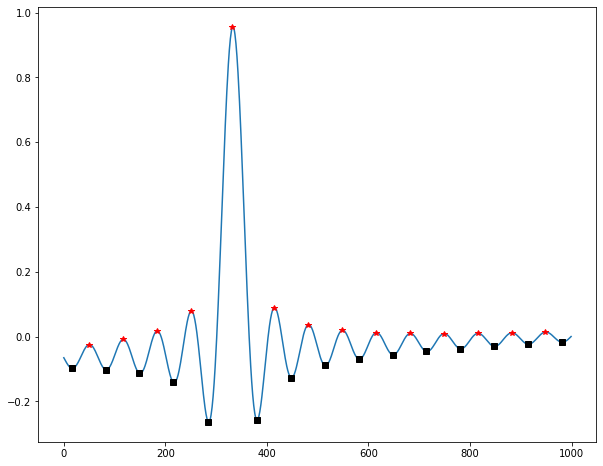

In [29]:
#4. find positive and negative point

maxima = np.squeeze(np.where(y_two_prime<0))
minima = np.squeeze(np.where(y_two_prime>0))

print(maxima)

plt.figure(figsize = (10,8))
plt.plot(y_d,label= 'detrended signal')
plt.plot(maxima,y_d[maxima],'r*')
plt.plot(minima,y_d[minima],'ks')

### 2.2 Envelope of a signal

The envelope of a signal usually carries a lot of information that can be exploit. It can be easily extracted using the Hilbert transform, which allows to compute the analytical signal from real one, see [Hilbert Transform wiki](https://en.wikipedia.org/wiki/Hilbert_transform).

We are going to create a chirp signal, with an amplitude modulated by a sinusoidal signal and we are goint to extract the envelope, and also compute the instantaneous frequency.

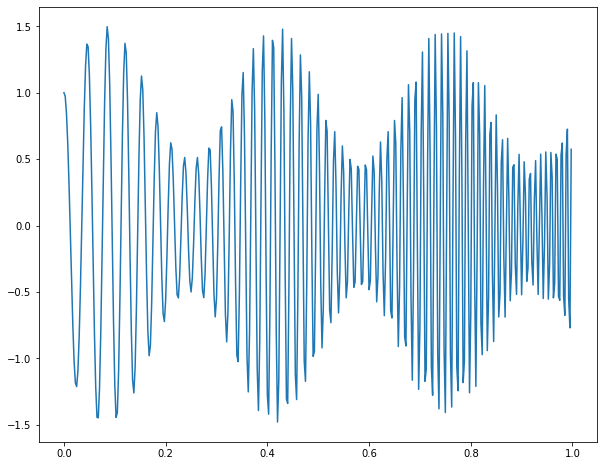

In [30]:
#from the help of scipy.signal.hilbert

duration = 1.0
fs = 400.0
samples = int(fs*duration)
t = np.arange(samples) / fs

# create chirp. Note that the amplitude modulation is imposed by multipliying the chirp signal times a sinusoidal signal

signal = sc.chirp(t, 20.0, t[-1], 100.0)
signal *= (1.0 + 0.5 * np.sin(2.0*np.pi*3.0*t) )

plt.figure(figsize = (10,8))
plt.plot(t,signal)

The **amplitude envelope** is given by magnitude of the analytic signal. The **instantaneous frequency** can be obtained by differentiating the instantaneous phase in respect to time. The instantaneous phase corresponds to the phase angle of the analytic signal.

In [31]:
#hilbert transform
analytic_signal = sc.hilbert(signal)
amplitude_envelope = np.abs(analytic_signal)
instantaneous_phase = np.unwrap(np.angle(analytic_signal))
instantaneous_frequency = (np.diff(instantaneous_phase) /(2.0*np.pi) * fs)

(0.0, 120.0)

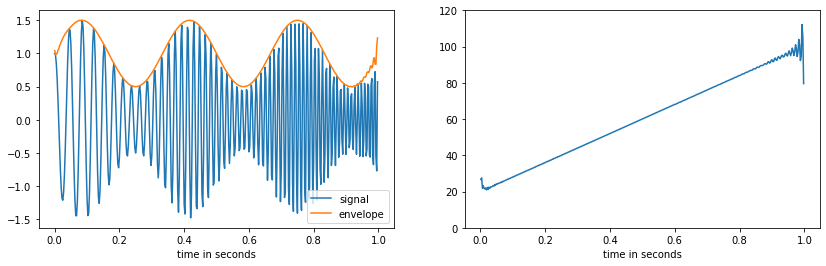

In [32]:
fig = plt.figure(figsize = (14,4))

ax0 = fig.add_subplot(121)
ax0.plot(t, signal, label='signal')
ax0.plot(t, amplitude_envelope, label='envelope')
ax0.set_xlabel("time in seconds")
ax0.legend()
ax1 = fig.add_subplot(122)
ax1.plot(t[1:], instantaneous_frequency)
ax1.set_xlabel("time in seconds")
ax1.set_ylim(0.0, 120.0)